# Import Necessary Libraries

In [61]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import precision_score, recall_score
# display images 
from IPython.display import Image
# linear algebra
import numpy as np 
# data processing
import pandas as pd 
# data visualization
import seaborn as sns 
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

# Titanic 
Titanic was a British passenger liner that sank in the North Atlantic Ocean in the early morning hours of 15 April 1912, after it collided with an iceberg during its maiden voyage from Southampton to New York City. There were an estimated 2,224 passengers and crew aboard the ship, and more than 1,500 died, making it one of the deadliest commercial peacetime maritime disasters in modern history. The RMS Titanic was the largest ship afloat at the time it entered service and was the second of three Olympic-class ocean liners operated by the White Star Line. The Titanic was built by the Harland and Wolff shipyard in Belfast. Thomas Andrews, her architect, died in the disaster.

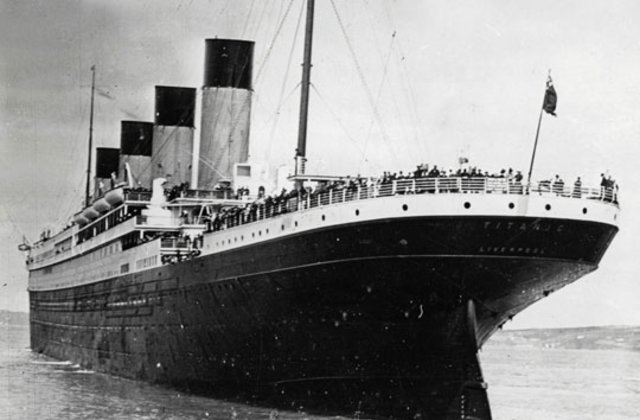

In [62]:
# Image of Titanic ship
Image(filename='C:/Users/Nemgeree Armanonah/Documents/GitHub/Titanic/images/ship.jpeg')

# Getting the Data

In [63]:
#reading train.csv
data = pd.read_csv('./titanic datasets/train.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Exploring Data

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Describe Statistics 
Describe method is used to view some basic statistical details like PassengerId,Servived,Age etc.

In [65]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### View All Features 

In [66]:
data.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

### What features could contribute to a high survival rate ?

To Us it would make sense if everything except ‘PassengerId’, ‘Ticket’ and ‘Name’ would be correlated with a high survival rate.

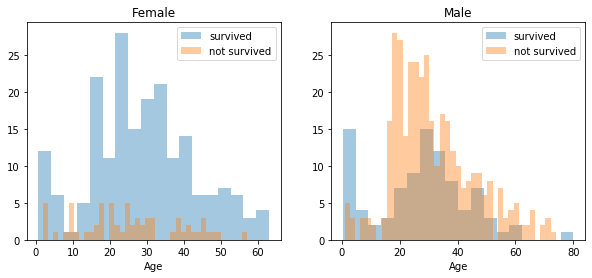

In [67]:
# defining variables
survived = 'survived'
not_survived = 'not survived'
# data to be plotted 
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = data[data['Sex']=='female']
men = data[data['Sex']=='male']
# plot the data
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

In [68]:
# count the null values 
null_values = data.isnull().sum()
null_values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

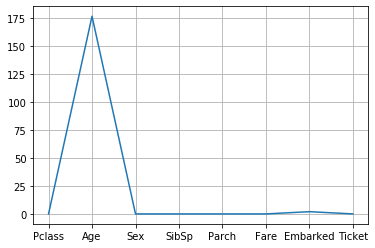

In [88]:
plt.plot(null_values)
plt.grid()
plt.show()

## Data Processing

In [103]:

def handle_non_numerical_data(df):
    
    columns = df.columns.values

    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):10
            return text_digit_vals[val]

        #print(column,df[column].dtype)
        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            
            column_contents = df[column].values.tolist()
            #finding just the uniques
            unique_elements = set(column_contents)
            # great, found them. 
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1
            df[column] = list(map(convert_to_int,df[column]))

    return df

IndentationError: unexpected indent (<ipython-input-103-9ca6f32d81e8>, line 8)

In [96]:
y_target = data['Survived']
# Y_target.reshape(len(Y_target),1)
x_train = data[['Pclass', 'Age', 'Sex', 'SibSp', 'Parch', 'Fare','Embarked', 'Ticket']]

x_train = handle_non_numerical_data(x_train)
x_train.head()

NameError: name 'handle_non_numerical_data' is not defined

In [73]:
fare = pd.DataFrame(x_train['Fare'])
# Normalizing
min_max_scaler = preprocessing.MinMaxScaler()
newfare = min_max_scaler.fit_transform(fare)
x_train['Fare'] = newfare
x_train

c:\users\nemgeree armanonah\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Pclass,Age,Sex,SibSp,Parch,Fare,Embarked,Ticket
0,3,22.0,male,1,0,0.014151,S,A/5 21171
1,1,38.0,female,1,0,0.139136,C,PC 17599
2,3,26.0,female,0,0,0.015469,S,STON/O2. 3101282
3,1,35.0,female,1,0,0.103644,S,113803
4,3,35.0,male,0,0,0.015713,S,373450
...,...,...,...,...,...,...,...,...
886,2,27.0,male,0,0,0.025374,S,211536
887,1,19.0,female,0,0,0.058556,S,112053
888,3,NaN,female,1,2,0.045771,S,W./C. 6607
889,1,26.0,male,0,0,0.058556,C,111369


In [74]:
null_values = x_train.isnull().sum()
null_values

Pclass        0
Age         177
Sex           0
SibSp         0
Parch         0
Fare          0
Embarked      2
Ticket        0
dtype: int64

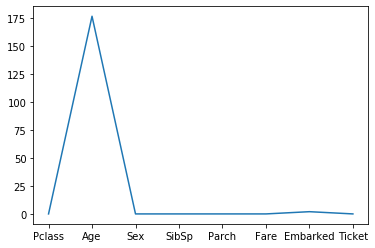

In [75]:
plt.plot(null_values)
plt.show()

In [76]:
# Fill the NAN values with the median values in the datasets
x_train['Age'] = x_train['Age'].fillna(x_train['Age'].median())
print("Number of NULL values" , x_train['Age'].isnull().sum())
x_train.head()

Number of NULL values 0


c:\users\nemgeree armanonah\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Pclass,Age,Sex,SibSp,Parch,Fare,Embarked,Ticket
0,3,22.0,male,1,0,0.014151,S,A/5 21171
1,1,38.0,female,1,0,0.139136,C,PC 17599
2,3,26.0,female,0,0,0.015469,S,STON/O2. 3101282
3,1,35.0,female,1,0,0.103644,S,113803
4,3,35.0,male,0,0,0.015713,S,373450


In [77]:
x_train['Sex'] = x_train['Sex'].replace('male', 0)
x_train['Sex'] = x_train['Sex'].replace('female', 1)
# print(type(x_train))
corr = x_train.corr()
corr.style.background_gradient()

c:\users\nemgeree armanonah\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\users\nemgeree armanonah\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Pclass,Age,Sex,SibSp,Parch,Fare
Pclass,1,-0.339898,-0.1319,0.0830814,0.0184427,-0.5495
Age,-0.339898,1,-0.0811625,-0.233296,-0.172482,0.0966884
Sex,-0.1319,-0.0811625,1,0.114631,0.245489,0.182333
SibSp,0.0830814,-0.233296,0.114631,1,0.414838,0.159651
Parch,0.0184427,-0.172482,0.245489,0.414838,1,0.216225
Fare,-0.5495,0.0966884,0.182333,0.159651,0.216225,1


In [78]:
def plot_corr(df,size=10):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);
# plot_corr(x_train)
x_train.corr()
corr.style.background_gradient()

,Pclass,Age,Sex,SibSp,Parch,Fare
Pclass,1,-0.339898,-0.1319,0.0830814,0.0184427,-0.5495
Age,-0.339898,1,-0.0811625,-0.233296,-0.172482,0.0966884
Sex,-0.1319,-0.0811625,1,0.114631,0.245489,0.182333
SibSp,0.0830814,-0.233296,0.114631,1,0.414838,0.159651
Parch,0.0184427,-0.172482,0.245489,0.414838,1,0.216225
Fare,-0.5495,0.0966884,0.182333,0.159651,0.216225,1


In [79]:
# Dividing the data into train and test data set
X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_target, test_size = 0.4, random_state = 40)

In [80]:
clf = RandomForestClassifier()
clf.fit(X_train, Y_train)

c:\users\nemgeree armanonah\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ValueError: could not convert string to float: 'C'

In [81]:
print(clf.predict(X_test))
print("Accuracy: ",clf.score(X_test, Y_test))

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [82]:
## Testing the model.
test_data = pd.read_csv('./titanic datasets/test.csv')
test_data.head(3)
# test_data.isnull().sum()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [104]:
### Preprocessing on the test data
test_data = test_data[['Pclass', 'Age', 'Sex', 'SibSp', 'Parch', 'Fare', 'Ticket', 'Embarked']]
test_data = handle_non_numerical_data(test_data)

fare = pd.DataFrame(test_data['Fare'])
min_max_scaler = preprocessing.MinMaxScaler()
newfare = min_max_scaler.fit_transform(fare)
test_data['Fare'] = newfare
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].median())
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].median())
test_data['Sex'] = test_data['Sex'].replace('male', 0)
test_data['Sex'] = test_data['Sex'].replace('female', 1)
print(test_data.head())


NameError: name 'handle_non_numerical_data' is not defined

In [105]:
print(clf.predict(test_data))

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [106]:
from sklearn.model_selection import cross_val_predict
predictions = cross_val_predict(clf, X_train, Y_train, cv=3)
print("Precision:", precision_score(Y_train, predictions))
print("Recall:",recall_score(Y_train, predictions))

ValueError: could not convert string to float: 'S'

In [107]:
from sklearn.metrics import precision_recall_curve

# getting the probabilities of our predictions
y_scores = clf.predict_proba(X_train)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(Y_train, y_scores)
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    plt.xlabel("threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.axis([0.3,0.8,0.8,1])
plt.show()

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [108]:
def plot_precision_vs_recall(precision, recall):
    plt.plot(recall, precision, "g--", linewidth=2.5)
    plt.ylabel("recall", fontsize=19)
    plt.xlabel("precision", fontsize=19)
    plt.axis([0, 1.5, 0, 1.5])

plt.figure(figsize=(14, 7))
plot_precision_vs_recall(precision, recall)
plt.show()

NameError: name 'precision' is not defined

<Figure size 1008x504 with 0 Axes>

In [87]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(clf, X_train, Y_train, cv=3)
confusion_matrix(Y_train, predictions)

ValueError: could not convert string to float: 'S'

True positive: 293 (We predicted a positive result and it was positive)
True negative: 143 (We predicted a negative result and it was negative)
False positive: 34 (We predicted a positive result and it was negative)
False negative: 64 (We predicted a negative result and it was positive)